# Preface

In this notebook, we visualize the K-means algorithm and also demonstrate some useful applications, including image compression and segmentation. We also introduce anomaly detection using the Gaussian mixture models, which can be seen as an extension of the K-means algorithm.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context('notebook', font_scale=1.25, rc={"lines.linewidth": 2.5})
sns.set_style("darkgrid")
np.random.seed(123)  # For reproducibility

In [2]:
import warnings
warnings.filterwarnings("ignore")

# Gaussian Mixture Model For Fraud Detection

Let us illustrate the usage of GMM for fraud detection.
The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

The detailed description of the dataset is found [here](https://www.kaggle.com/mlg-ulb/creditcardfraud)

In [3]:
data = pd.read_csv('/content/creditcard(1).csv')

**Brief Description of Features**

  * Time: seconds elapsed from first transaction
  * V1-V28: PCA transforms of raw features (raw features hidden for privacy)
  * Amount: total amount spent on the transaction
  * Class: 1 = Fraud, 0 = Normal

In [4]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
# Displaying the summary statistics of the DataFrame 'data'
# This will give us a quick overview of the distribution of each numerical column
# The output will include:
# - Count: Number of non-null entries
# - Mean: Average value for each column
# - Std: Standard deviation for each column
# - Min: Minimum value in each column
# - 25%, 50%, 75%: Percentiles (1st quartile, median, 3rd quartile)
# - Max: Maximum value in each column

data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


We have an extremely imbalanced dataset! Direct supervised learning requires careful data-balancing.

We will proceed is another way using unsupervised density estimation with Gaussian mixtures.

In [6]:
print(f'Normal Transactions: {np.sum(data.Class == 0)}')
print(f'Fraudulent Transactions: {np.sum(data.Class == 1)}')

Normal Transactions: 284315
Fraudulent Transactions: 492


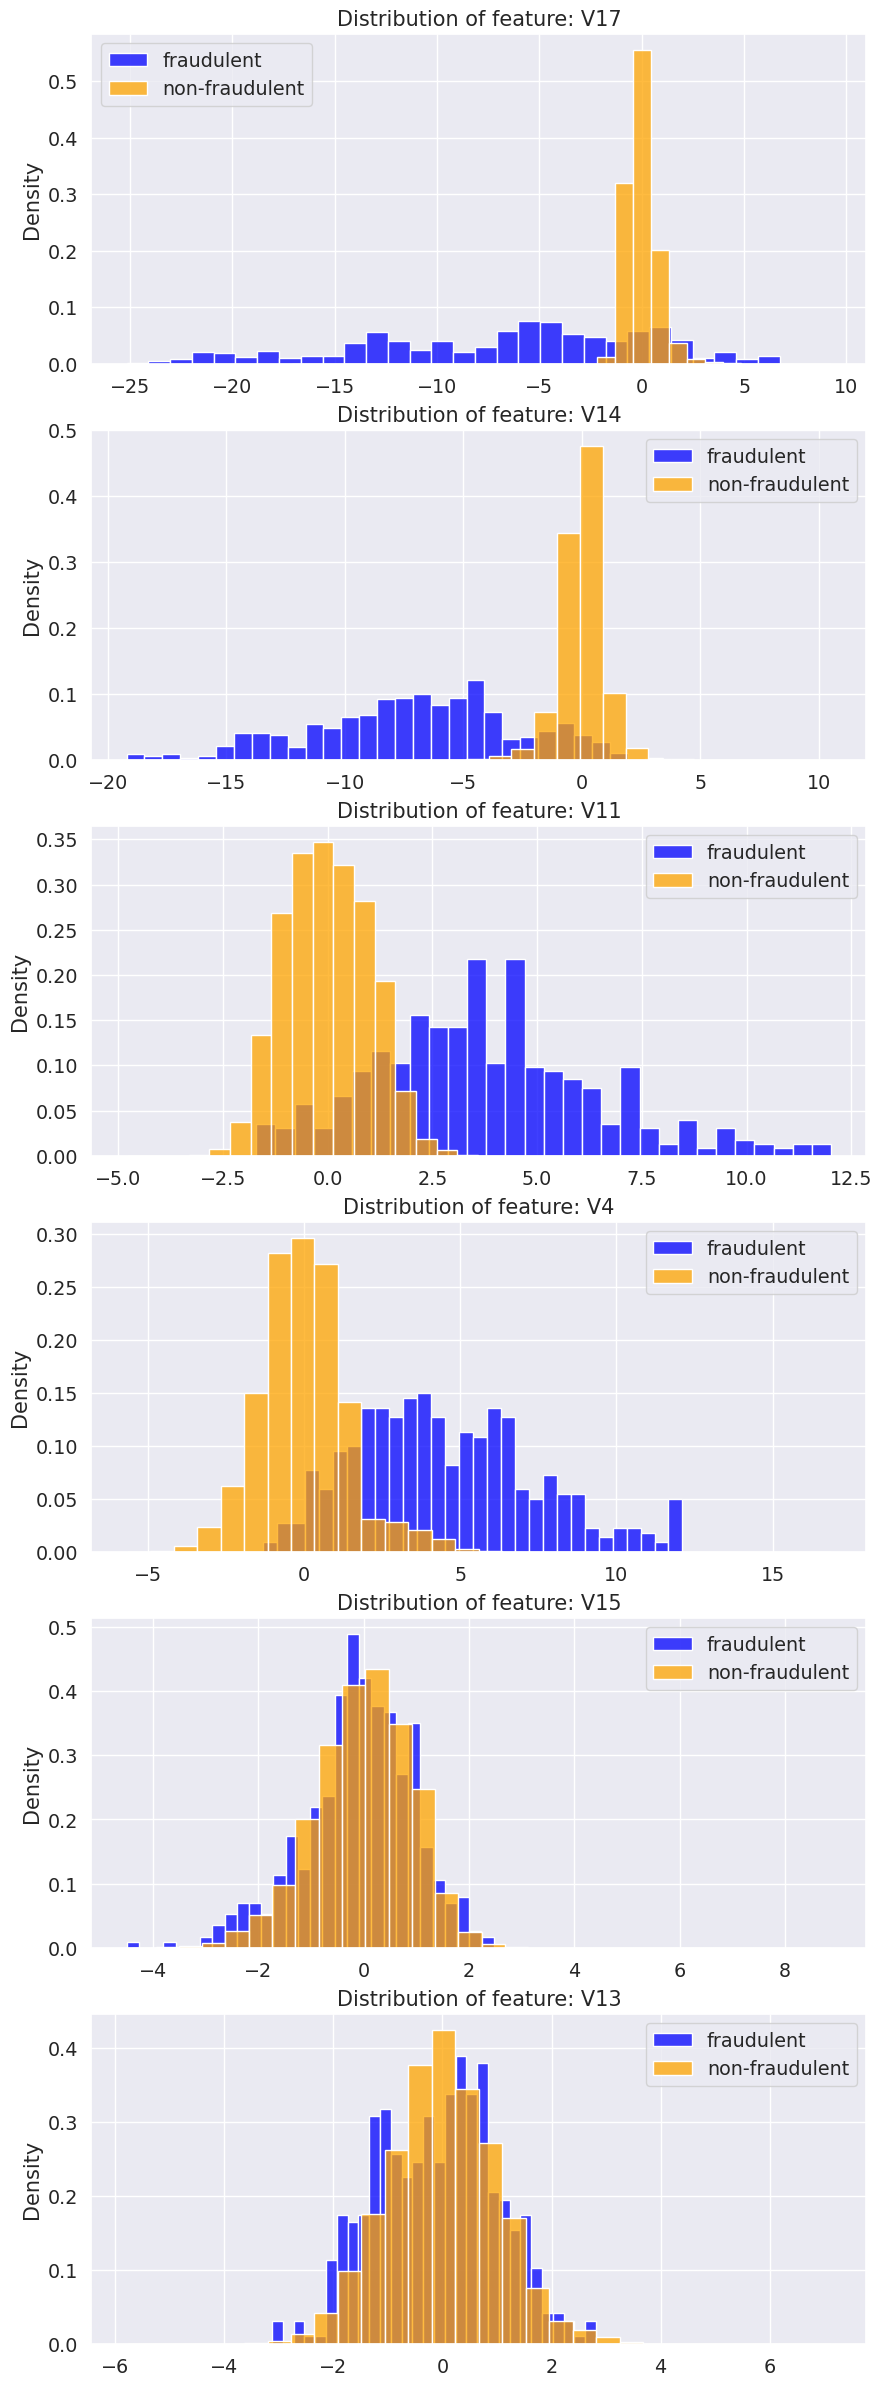

In [7]:
# Importing the 'gridspec' module from matplotlib to facilitate flexible grid arrangements in the figure
import matplotlib.gridspec as gridspec

# Defining the list of features that we will plot histograms for
features = ['V17', 'V14', 'V11', 'V4', 'V15', 'V13']

fig, ax = plt.subplots(len(features), 1, figsize=(10, 5*len(features)))

for (f, a) in zip(features, ax):
    # Plotting the distribution of fraudulent transactions (Class == 1) for the current feature (f)
    sns.histplot(data[f][data.Class == 1], bins=30, ax=a, color='blue', stat='density')

    # Plotting the distribution of non-fraudulent transactions (Class == 0) for the current feature (f)
    sns.histplot(data[f][data.Class == 0], bins=30, ax=a, color='orange', stat='density')

    a.legend(['fraudulent', 'non-fraudulent'])
    a.set_xlabel('')
    a.set_title('Distribution of feature: ' + f)

## Training GMM on normal data

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.mixture import GaussianMixture

We split the dataset to non-fraudulent and fraudulent portions

In [9]:
data_0=data[data.Class==0]
data_1=data[data.Class==1]

We shall only use two of the most correlated features, *V14* and *V17*

In [10]:
data_0=data_0[['V14', 'V17','Class']]
data_1=data_1[['V14', 'V17', 'Class']]

Next, we do some data splitting.

We split
  * the non-fraudulent data 90%-10% for training the GMM and testing
  * the fraudulent data 50%-50% for cross validation and testing

In [11]:
x_train, x_test, y_train, y_test = train_test_split(
    data_0.drop(['Class'], axis=1),
    data_0['Class'],
    test_size=0.1,
)
x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(
    data_1.drop(['Class'], axis=1),
    data_1['Class'],
    test_size=0.5,
)

You can also use stratify in train_test_split

In [12]:
# The 'n_components' parameter specifies the number of Gaussian distributions to fit in the mixture model.
gmm = GaussianMixture(n_components=5)  # How do we choose n_components?

In [13]:
gmm.fit(x_train)

GaussianMixture(n_components=5)

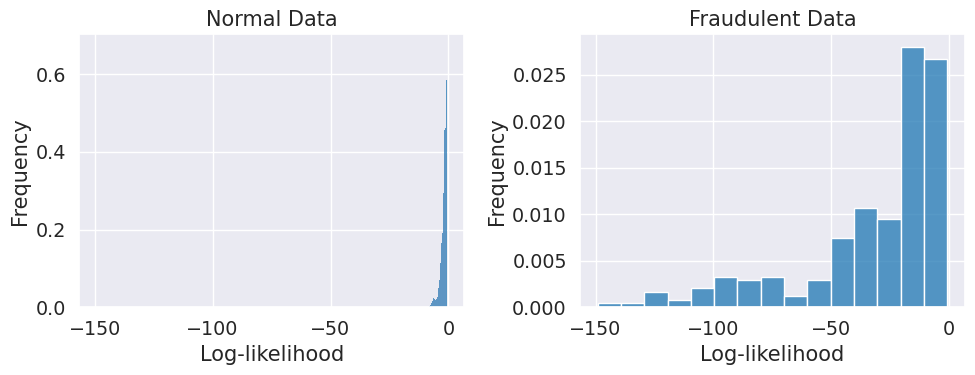

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4), sharex=True)

# Plotting the log-likelihood values for the normal data (training data of non-fraudulent transactions).
# 'gmm.score_samples(x_train)' computes the log-likelihood of the normal data points under the GMM model.
# The 'stat="density"' argument normalizes the histogram so it represents the probability density.
sns.histplot(gmm.score_samples(x_train), stat='density', ax=ax[0])

sns.histplot(gmm.score_samples(x_train_1), stat='density', ax=ax[1])

ax[0].set_title('Normal Data')
ax[1].set_title('Fraudulent Data')

for a in ax:
    a.set_xlabel('Log-likelihood')
    a.set_ylabel('Frequency')

# Adjusting the layout of the figure to prevent overlap and ensure elements are nicely spaced.
fig.tight_layout()

## Set a threshold for fraud detection

We evaluate the performance of our model using different thresholds using *precision* and *recall*.

![Image of Yaktocat](https://upload.wikimedia.org/wikipedia/commons/thumb/2/26/Precisionrecall.svg/350px-Precisionrecall.svg.png)

Ideally, we want to have both precision and recall to be high. A summary statistic is the F1-score, given by
$$
    \text{F1-score}
    =
    2
    \times
    \frac
    {
        \text{precision} \times \text{recall}
    }
    {
        \text{precision} + \text{recall}
    }
$$

In [15]:
from sklearn.metrics import precision_recall_fscore_support

# Defining the function to evaluate the model performance at different log-likelihood thresholds
def evaluate_threshold(x, y, thresholds):
    log_likelihoods = gmm.score_samples(x)

    precisions = []
    recalls = []
    f1s = []

    for t in thresholds:
        # Predicted class labels based on the threshold: if log-likelihood < threshold, classify as fraud (1)
        y_pred = 1 * (log_likelihoods < t)

        # Calculating precision, recall, and F1-score using the true labels 'y' and the predicted labels 'y_pred'
        p, r, f1, _ = precision_recall_fscore_support(y, y_pred, average='binary')

        precisions.append(p)
        recalls.append(r)
        f1s.append(f1)

    return precisions, recalls, f1s

In [16]:
x_train_combined = np.concatenate([x_train, x_train_1])
y_train_combined = np.concatenate([y_train, y_train_1])

In [17]:
# Generate 10 evenly spaced threshold values between -100 and -5
thresholds = np.linspace(-100, -5, 10)

In [18]:
p_train, r_train, f1_train = evaluate_threshold(x_train_combined, y_train_combined, thresholds)

Text(0.5, 0, 'Thresholds for log-likelihood')

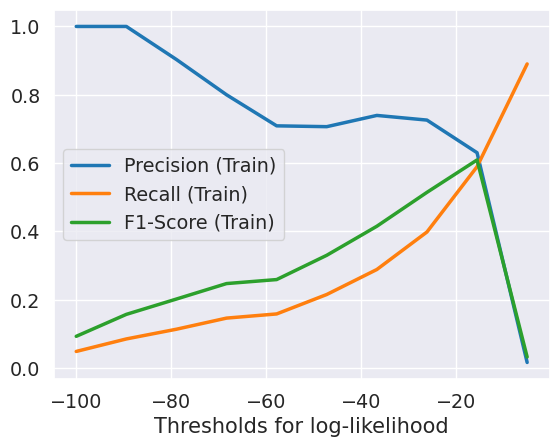

In [19]:
plt.plot(thresholds, p_train, label='Precision (Train)')
plt.plot(thresholds, r_train, label='Recall (Train)')
plt.plot(thresholds, f1_train, label='F1-Score (Train)')
plt.legend()
plt.xlabel('Thresholds for log-likelihood')

In [20]:
chosen_threshold = thresholds[np.argmax(f1_train)]

With the chosen threshold, let us use this to predict anomalies. Given a new test data point, we classify it as a Fraudulent transaction if its log-likelihood is smaller than the `chosen_threshold`.

In [21]:
from sklearn.metrics import classification_report

In [22]:
x_test_combined = np.concatenate([x_test, x_test_1])
y_test_combined = np.concatenate([y_test, y_test_1])

In [23]:
y_test_pred = gmm.score_samples(x_test_combined) < chosen_threshold

In [24]:
# The classification_report provides various performance metrics for classification models
# It computes precision, recall, F1-score, and support for each class (fraudulent and non-fraudulent)
print(classification_report(y_test_combined, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.94      0.59      0.72       246

    accuracy                           1.00     28678
   macro avg       0.97      0.79      0.86     28678
weighted avg       1.00      1.00      1.00     28678

